Постановка задачи:
1) Написать функцию вычисления аналитического решения системы уравнений движения частицы. Нарисовать графики аналитических траекторий для различных параметров
2) Написать программу для решения уравнений движения частицы неявной схемой (10) (11) Нарисовать графики численных   траекторий для различных параметров
3) вычислить и нарисовать графики точности численного решения от времени 

Импорт:

In [2]:
from numpy import tan, pi, exp, array, arange, degrees, append
import matplotlib.pyplot as plt

Входные данные:

In [3]:
x0, z0 = 0, 0
vx0 = 1

Построение графика:

In [4]:
def plot(x, y, z, style1, style2, xlabel, ylabel, legend, title, alpha, beta):
    plt.plot(x, y, style1)
    plt.plot(x, z, style2)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(legend)
    plt.title(label=title + '\n' + str(f'alpha = {int(degrees(alpha))}') + str(f'    beta = {beta}'))
    plt.grid(True)
    plt.show()

Рассчет значений:

In [5]:
def func(alpha, beta):
    assert 0 <= alpha <= pi / 2, 'alpha < 0 or alpha > pi/2'
    assert beta != 0, 'beta = 0'
    vz0 = tan(alpha)
    vx = lambda t: exp(-beta * t)
    vz = lambda t: (vz0 + 2 * vz0 / beta) * exp(-beta * t) - 2 * vz0 / beta
    x = lambda t: (1 - exp(-beta * t)) / beta
    z = lambda t: (vz0 + 2 * vz0 / beta) * (1 - exp(-beta * t)) / beta - 2 * t * vz0 / beta
    num_vx = [vx0]
    num_vz = [vz0]
    num_x = [x0]
    num_z = [z0]
    T = arange(x0, x0 + 1, beta)
    delta_t = 1e-3
    for _ in T:
        vxn = num_vx[-1] * (1 - beta * delta_t / 2) * (1 + beta * delta_t / 2)
        num_vx = append(num_vx, [vxn])
        vzn = (num_vz[-1] * (1 - beta * delta_t / 2) - 2 * vz0 * delta_t) / (1 + beta * delta_t / 2)
        num_vz = append(num_vz, [vzn])

        xn = num_x[-1] + (num_vx[-2] + num_vx[-1]) * delta_t / 2
        num_x = append(num_x, [xn])
        zn = num_z[-1] + (num_vz[-2] + num_vz[-1]) * delta_t / 2
        num_z = append(num_z, [zn])
    T = append(T, [1])
    an_x = array(list(map(x, T)))
    an_z = array(list(map(z, an_x)))
    an_vx = array(list(map(vx, T)))
    an_vz = array(list(map(vz, T)))
    delta_x = array(list(map(lambda x: abs(x[0] - x[1]), zip(an_x, num_x))))
    delta_z = array(list(map(lambda x: abs(x[0] - x[1]), zip(an_z, num_z))))
    delta_vx = array(list(map(lambda x: abs(x[0] - x[1]), zip(an_vx, num_vx))))
    delta_vz = array(list(map(lambda x: abs(x[0] - x[1]), zip(an_vz, num_vz))))
    plot(T, an_x, an_z, 'b-', 'r-', 'Time', 'Cords', ['x(t)', 'z(x)'], 'Аналитическое решение', alpha, beta)
    plot(T, an_vx, an_vz, 'b-', 'r-', 'Time', 'Speed', ['vx(t)', 'vz(x)'], 'Аналитическое решение', alpha, beta)
    plot(T, num_x, num_z, 'b-', 'r-', 'Time', 'Cords', ['x(t)', 'z(x)'], 'Численное решение', alpha, beta)
    plot(T, num_vx, num_vz, 'b-', 'r-', 'Time', 'Speed', ['vx(t)', 'vz(x)'], 'Численное решение', alpha, beta)
    plot(T, delta_x, delta_z, 'b-', 'r-', 'Time', 'Cords', ['delta_x(t)', 'delta_z(x)'], 'Дельта', alpha, beta)
    plot(T, delta_vx, delta_vz, 'b-', 'r-', 'Time', 'Speed', ['delta_vx(t)', 'delta_vz(x)'], 'Дельта', alpha, beta)

Вызов функции:

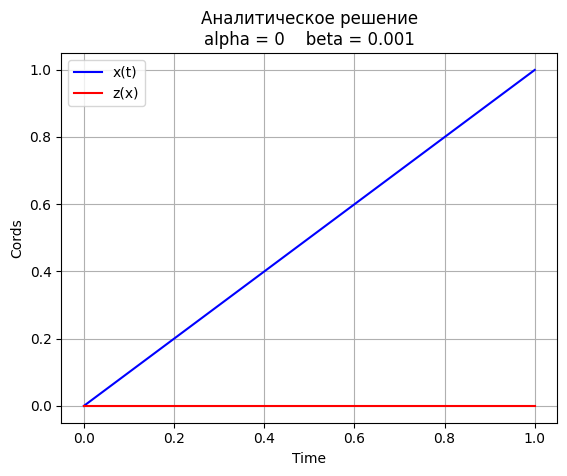

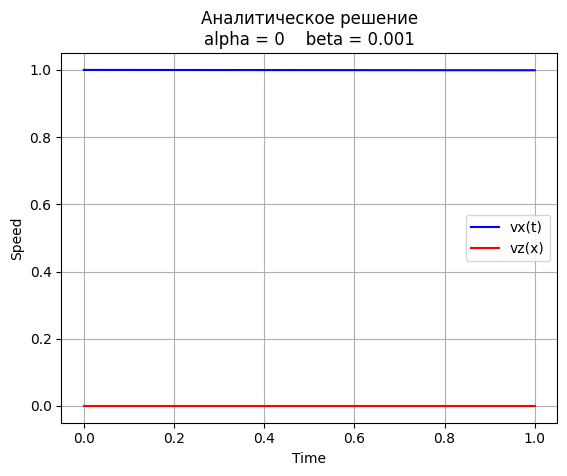

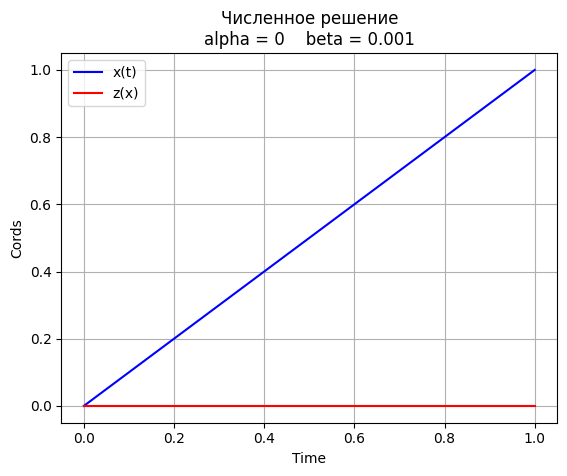

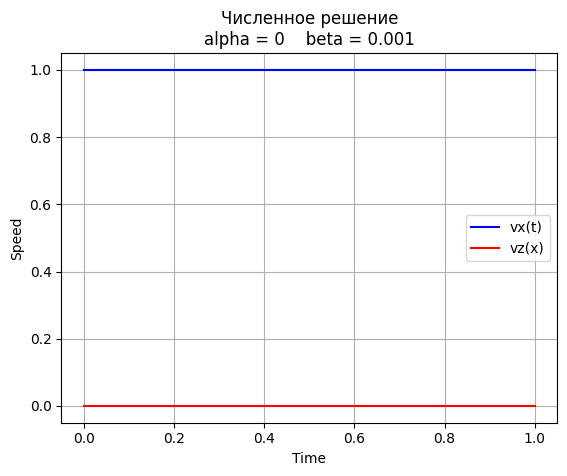

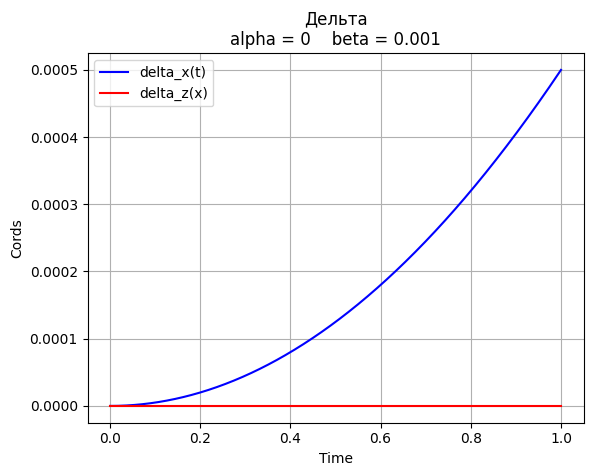

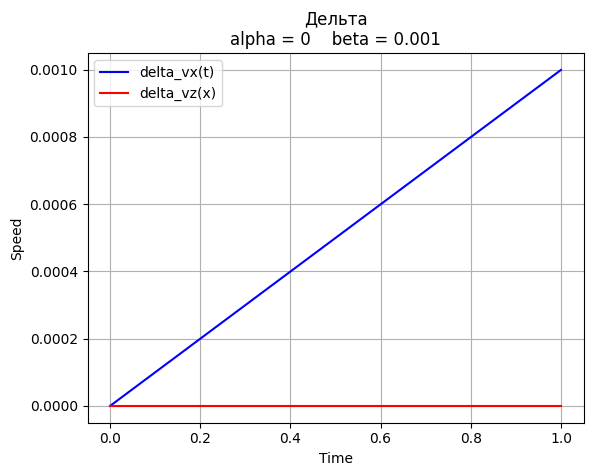

In [6]:
func(0, 1e-3)

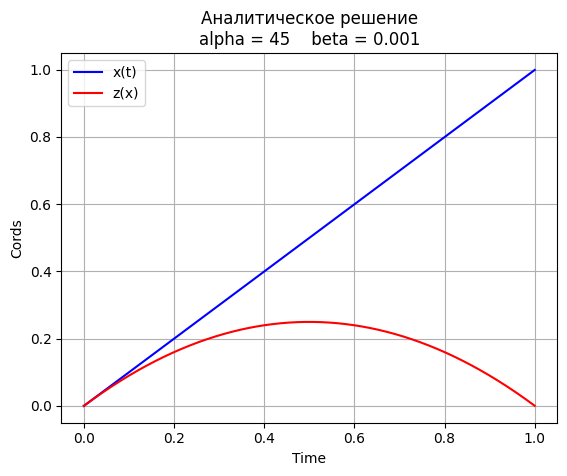

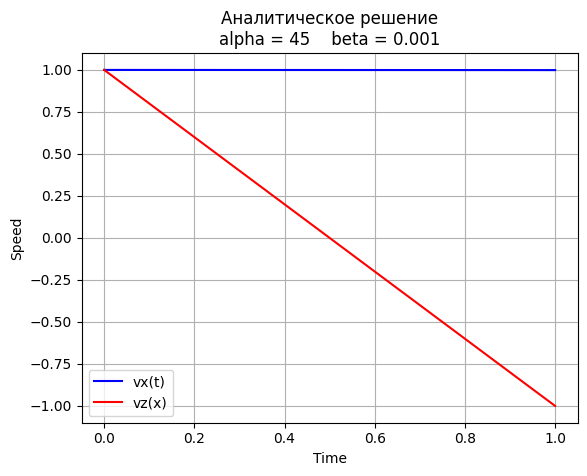

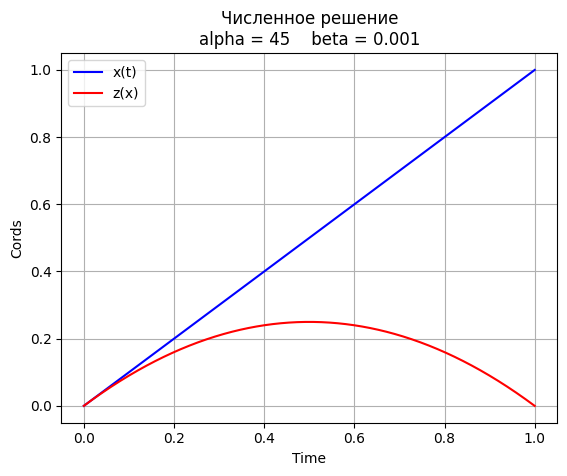

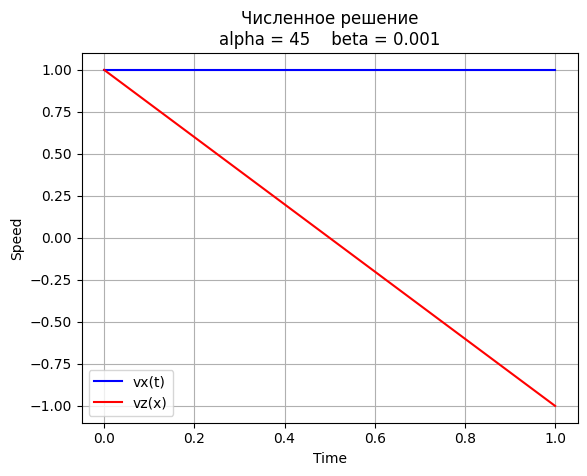

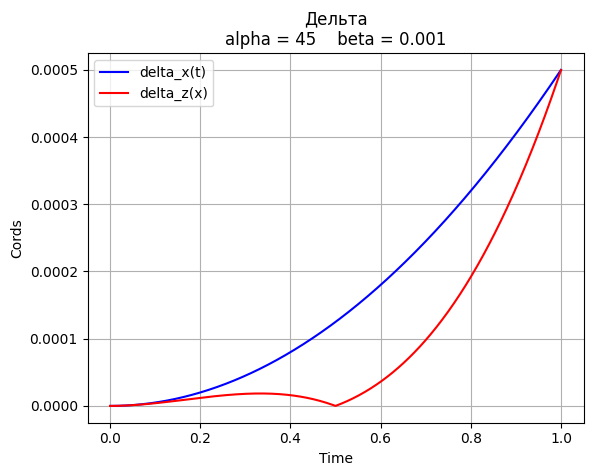

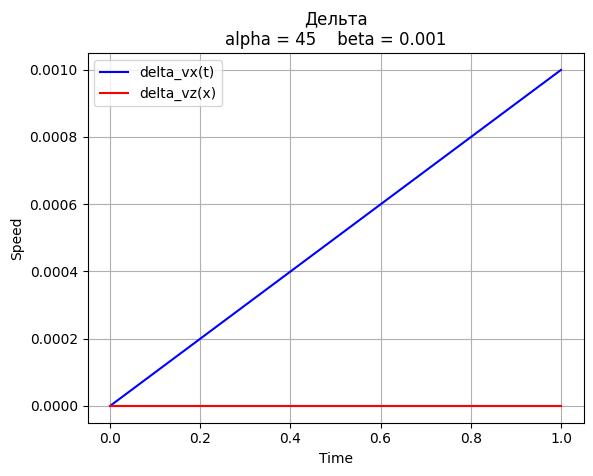

In [7]:
func(pi/4, 1e-3)

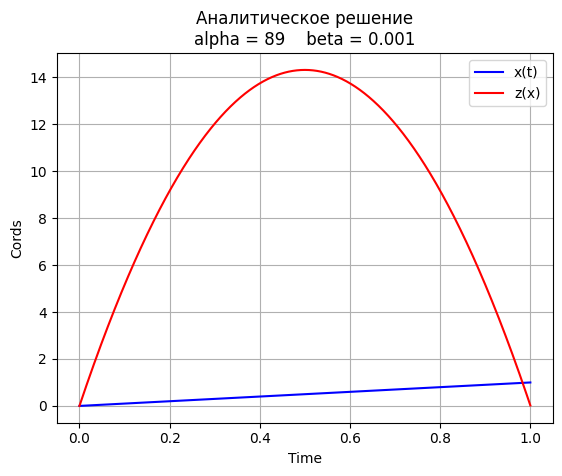

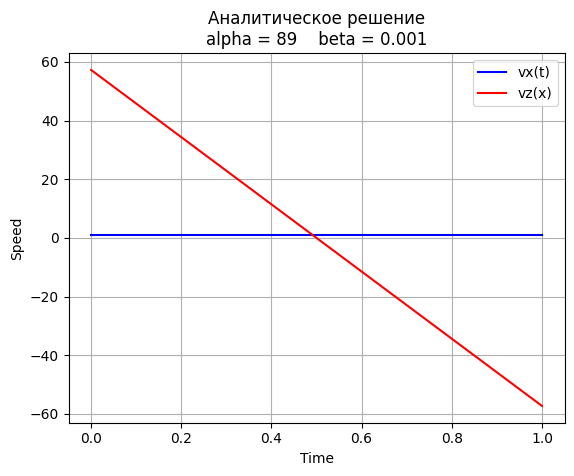

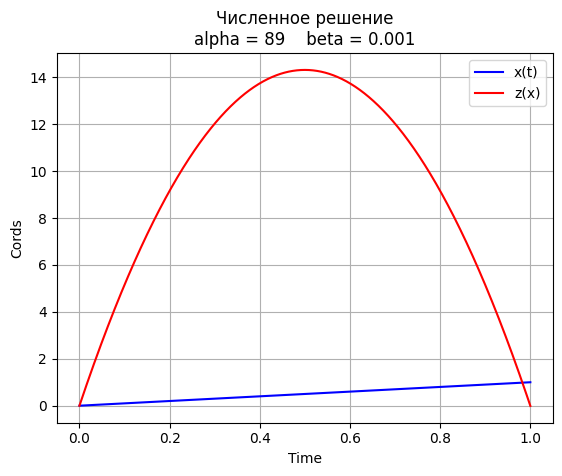

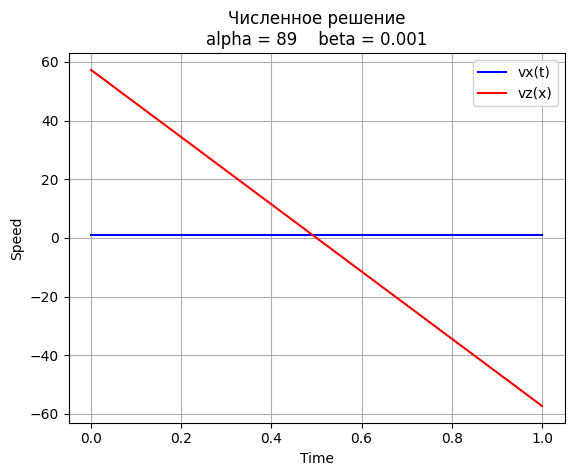

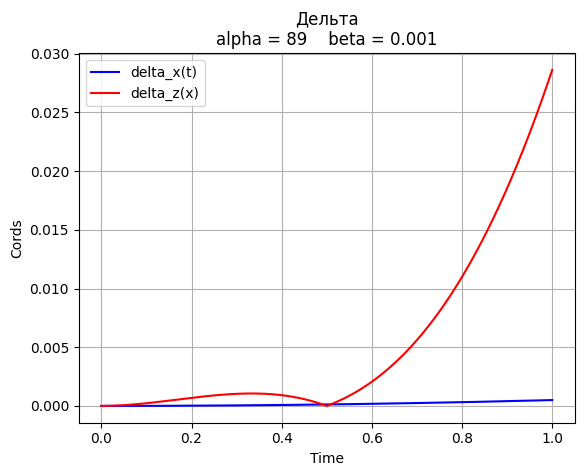

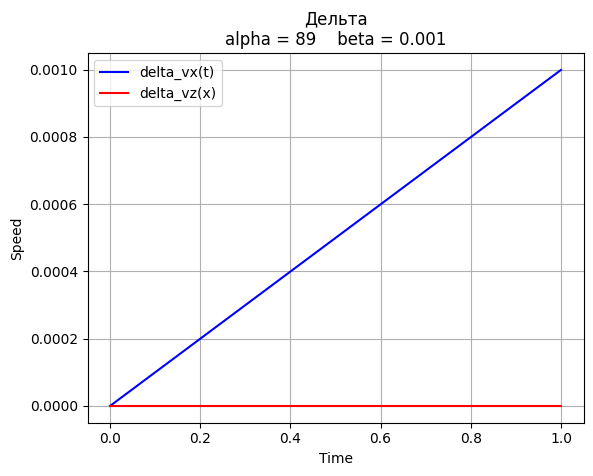

In [10]:
func(pi/(180/89), 1e-3)

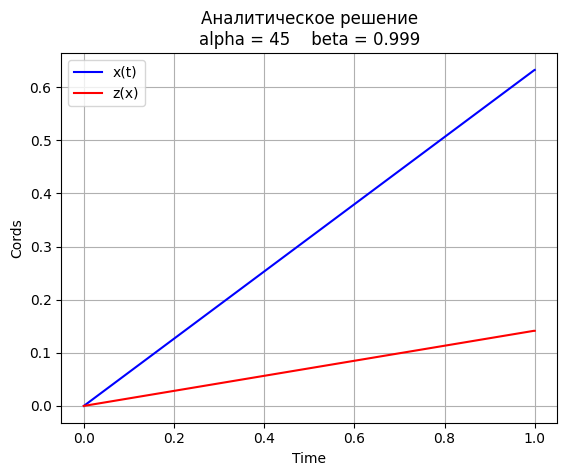

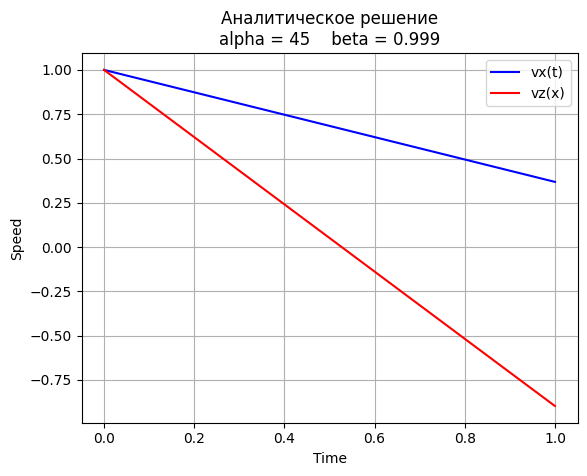

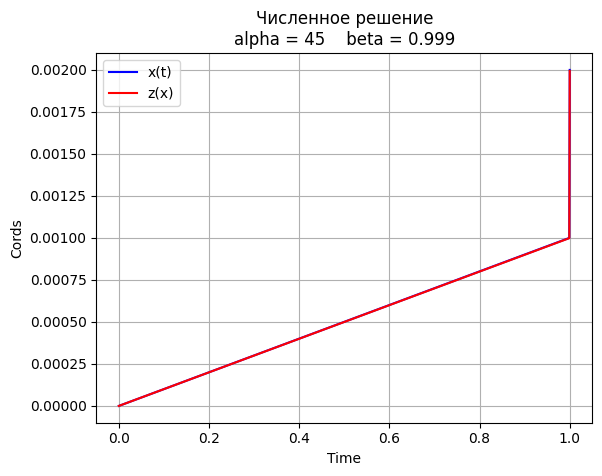

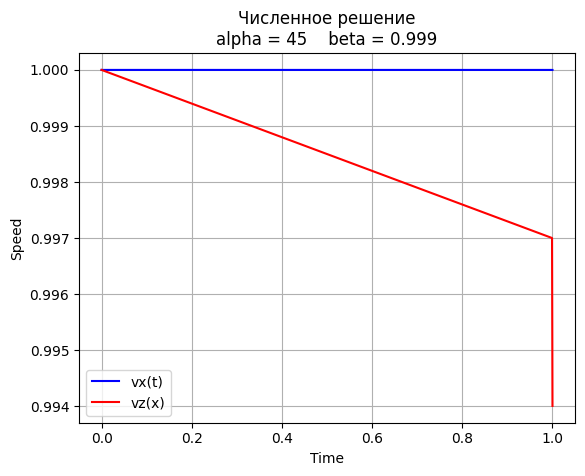

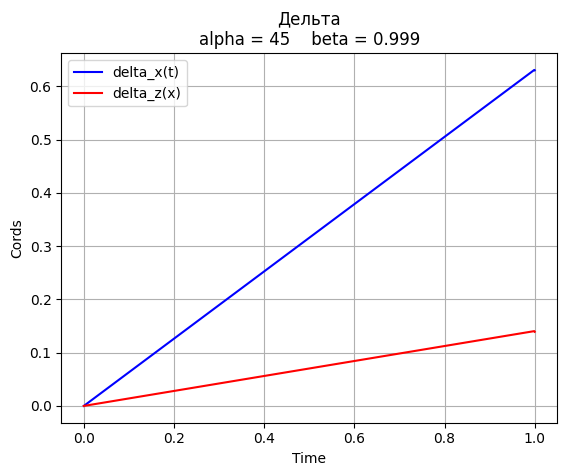

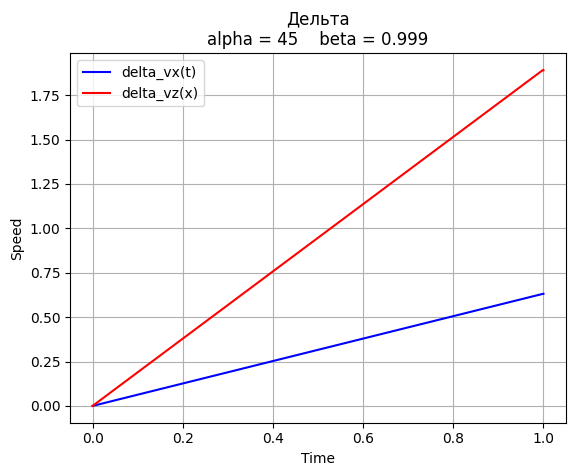

In [9]:
func(pi/4, 1-1e-3)